In [1]:
### Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr

In [3]:
yf.pdr_override()
df = pdr.get_data_yahoo("ZW=F", start="2016-01-01", end="2023-03-27")
#df = pd.DataFrame(data = df, columns=['Open','High', 'Low','Close','Adj Close','Volume'])
if isinstance(df, pd.DataFrame):
    df.head()

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,472.75,473.50,456.00,458.25,458.25,79124
2016-01-05,460.25,464.75,458.50,461.25,461.25,52297
2016-01-06,461.25,465.75,456.75,462.75,462.75,44780
2016-01-07,464.00,469.00,456.25,468.50,468.50,65716
2016-01-08,468.25,480.00,467.50,478.50,478.50,86311


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-20,708.50,708.5,695.25,700.75,700.75,61276
2023-03-21,700.00,705.5,680.25,683.25,683.25,68061
2023-03-22,682.50,684.0,654.00,663.50,663.50,89216
2023-03-23,663.00,675.5,657.25,662.00,662.00,56070
2023-03-24,660.25,700.5,656.25,688.50,688.50,56070


In [6]:
df.shape

(1817, 6)

In [7]:
df1=df.reset_index()['High']

In [8]:
df1

0       473.50
1       464.75
2       465.75
3       469.00
4       480.00
         ...  
1812    708.50
1813    705.50
1814    684.00
1815    675.50
1816    700.50
Name: High, Length: 1817, dtype: float64

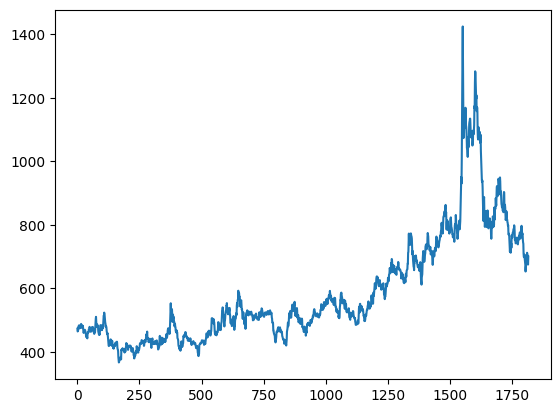

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [11]:
import numpy as np

In [12]:
df1

0       473.50
1       464.75
2       465.75
3       469.00
4       480.00
         ...  
1812    708.50
1813    705.50
1814    684.00
1815    675.50
1816    700.50
Name: High, Length: 1817, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
df1

array([[0.10063785],
       [0.09236948],
       [0.09331443],
       ...,
       [0.29955115],
       [0.29151902],
       [0.31514292]])

In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(1181, 636)

In [17]:
train_data

array([[0.10063785],
       [0.09236948],
       [0.09331443],
       ...,
       [0.17150957],
       [0.16631231],
       [0.17221828]])

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(1080, 100)
(1080,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(535, 100)
(535,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 11s 320ms/step - loss: 0.0030 - val_loss: 0.0429
Epoch 2/100
17/17 [==============================] - 4s 221ms/step - loss: 8.4396e-04 - val_loss: 0.0080
Epoch 3/100
17/17 [==============================] - 3s 181ms/step - loss: 5.3848e-04 - val_loss: 0.0048
Epoch 4/100
17/17 [==============================] - 4s 223ms/step - loss: 4.9595e-04 - val_loss: 0.0051
Epoch 5/100
17/17 [==============================] - 3s 174ms/step - loss: 4.5444e-04 - val_loss: 0.0044
Epoch 6/100
17/17 [==============================] - 4s 232ms/step - loss: 4.2924e-04 - val_loss: 0.0049
Epoch 7/100
17/17 [==============================] - 3s 192ms/step - loss: 4.0526e-04 - val_loss: 0.0037
Epoch 8/100
17/17 [==============================] - 4s 258ms/step - loss: 3.8413e-04 - val_loss: 0.0034
Epoch 9/100
17/17 [==============================] - 4s 217ms/step - loss: 3.6782e-04 - val_loss: 0.0037
Epoch 10/100
17/17 [==============================] - 3s 1

In [28]:
import tensorflow as tf

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 1s 53ms/step


In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

483.2570305308861

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

798.4506813770437

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

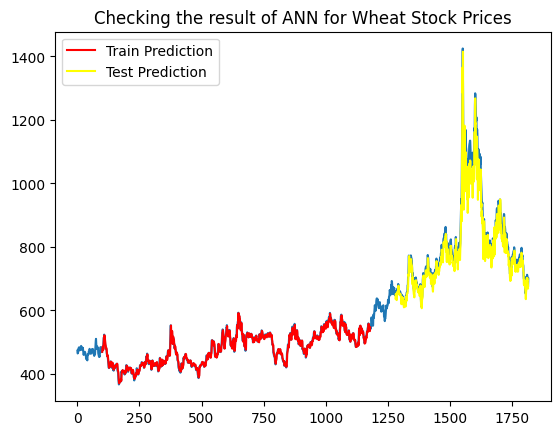

In [34]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, color = "red", label = "Train Prediction")
plt.plot(testPredictPlot, color = "yellow", label = "Test Prediction")
plt.legend()
plt.title("Checking the result of ANN for Wheat Stock Prices")
plt.show()

In [35]:
len(test_data)

636

In [36]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 295)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.4006614694070399,
 0.4115284668084101,
 0.4389321993857784,
 0.42570281124497994,
 0.40491377273801094,
 0.40302386014646824,
 0.4077486416253248,
 0.3871958421922986,
 0.3888495157098984,
 0.3680604772029294,
 0.37821875738247107,
 0.3869596031183558,
 0.39215686274509803,
 0.3980628395936688,
 0.4108197495865817,
 0.4150720529175526,
 0.42192298606189466,
 0.4108197495865817,
 0.39664540515001184,
 0.40845735884715334,
 0.4207417906921805,
 0.45287030474840545,
 0.4847625797306874,
 0.5282305693361682,
 0.5520907158043942,
 0.5324828726671391,
 0.6024096385542168,
 0.7228915662650603,
 0.8712497047011576,
 0.9270021261516657,
 1.0,
 0.89983463264824,
 0.7866761162296245,
 0.6678478620363808,
 0.6832034018426649,
 0.6832034018426649,
 0.7500590597684857,
 0.7488778643987717,
 0.7004488542404914,
 0.6983227025750061,
 0.73871958421923,
 0.7580911882825421,
 0.7295062603354596,
 0.7068273092369479,
 0.7011575714623199,
 0.6888731396172927,
 0.6626506024096386,
 0.6376092605716985,
 0

In [39]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=294
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.41152847 0.4389322  0.42570281 0.40491377 0.40302386 0.40774864
 0.38719584 0.38884952 0.36806048 0.37821876 0.3869596  0.39215686
 0.39806284 0.41081975 0.41507205 0.42192299 0.41081975 0.39664541
 0.40845736 0.42074179 0.4528703  0.48476258 0.52823057 0.55209072
 0.53248287 0.60240964 0.72289157 0.8712497  0.92700213 1.
 0.89983463 0.78667612 0.66784786 0.6832034  0.6832034  0.75005906
 0.74887786 0.70044885 0.6983227  0.73871958 0.75809119 0.72950626
 0.70682731 0.70115757 0.68887314 0.6626506  0.63760926 0.66902906
 0.62910465 0.6118592  0.6680841  0.65131113 0.64020789 0.64942121
 0.68485708 0.7091897  0.71556815 0.71863926 0.7254902  0.72572644
 0.70186629 0.68721947 0.66997401 0.67375384 0.68887314 0.68036853
 0.68698323 0.67847862 0.64564139 0.65107489 0.66406804 0.68887314
 0.69123553 0.67942358 0.69123553 0.70682731 0.76305221 0.75620128
 0.83203402 0.86652492 0.8627451  0.83227026 0.79470824 0.78407749
 0.79541696 0.74793291 0.74958658 0.75903614 0.74675171 0.

2 day output [[0.30327657]]
3 day input [0.40491377 0.40302386 0.40774864 0.38719584 0.38884952 0.36806048
 0.37821876 0.3869596  0.39215686 0.39806284 0.41081975 0.41507205
 0.42192299 0.41081975 0.39664541 0.40845736 0.42074179 0.4528703
 0.48476258 0.52823057 0.55209072 0.53248287 0.60240964 0.72289157
 0.8712497  0.92700213 1.         0.89983463 0.78667612 0.66784786
 0.6832034  0.6832034  0.75005906 0.74887786 0.70044885 0.6983227
 0.73871958 0.75809119 0.72950626 0.70682731 0.70115757 0.68887314
 0.6626506  0.63760926 0.66902906 0.62910465 0.6118592  0.6680841
 0.65131113 0.64020789 0.64942121 0.68485708 0.7091897  0.71556815
 0.71863926 0.7254902  0.72572644 0.70186629 0.68721947 0.66997401
 0.67375384 0.68887314 0.68036853 0.68698323 0.67847862 0.64564139
 0.65107489 0.66406804 0.68887314 0.69123553 0.67942358 0.69123553
 0.70682731 0.76305221 0.75620128 0.83203402 0.86652492 0.8627451
 0.83227026 0.79470824 0.78407749 0.79541696 0.74793291 0.74958658
 0.75903614 0.74675171 0.6

6 day output [[0.2571376]]
7 day input [0.38884952 0.36806048 0.37821876 0.3869596  0.39215686 0.39806284
 0.41081975 0.41507205 0.42192299 0.41081975 0.39664541 0.40845736
 0.42074179 0.4528703  0.48476258 0.52823057 0.55209072 0.53248287
 0.60240964 0.72289157 0.8712497  0.92700213 1.         0.89983463
 0.78667612 0.66784786 0.6832034  0.6832034  0.75005906 0.74887786
 0.70044885 0.6983227  0.73871958 0.75809119 0.72950626 0.70682731
 0.70115757 0.68887314 0.6626506  0.63760926 0.66902906 0.62910465
 0.6118592  0.6680841  0.65131113 0.64020789 0.64942121 0.68485708
 0.7091897  0.71556815 0.71863926 0.7254902  0.72572644 0.70186629
 0.68721947 0.66997401 0.67375384 0.68887314 0.68036853 0.68698323
 0.67847862 0.64564139 0.65107489 0.66406804 0.68887314 0.69123553
 0.67942358 0.69123553 0.70682731 0.76305221 0.75620128 0.83203402
 0.86652492 0.8627451  0.83227026 0.79470824 0.78407749 0.79541696
 0.74793291 0.74958658 0.75903614 0.74675171 0.69076305 0.66902906
 0.66359556 0.70092133 

10 day output [[0.22405097]]
11 day input [0.39215686 0.39806284 0.41081975 0.41507205 0.42192299 0.41081975
 0.39664541 0.40845736 0.42074179 0.4528703  0.48476258 0.52823057
 0.55209072 0.53248287 0.60240964 0.72289157 0.8712497  0.92700213
 1.         0.89983463 0.78667612 0.66784786 0.6832034  0.6832034
 0.75005906 0.74887786 0.70044885 0.6983227  0.73871958 0.75809119
 0.72950626 0.70682731 0.70115757 0.68887314 0.6626506  0.63760926
 0.66902906 0.62910465 0.6118592  0.6680841  0.65131113 0.64020789
 0.64942121 0.68485708 0.7091897  0.71556815 0.71863926 0.7254902
 0.72572644 0.70186629 0.68721947 0.66997401 0.67375384 0.68887314
 0.68036853 0.68698323 0.67847862 0.64564139 0.65107489 0.66406804
 0.68887314 0.69123553 0.67942358 0.69123553 0.70682731 0.76305221
 0.75620128 0.83203402 0.86652492 0.8627451  0.83227026 0.79470824
 0.78407749 0.79541696 0.74793291 0.74958658 0.75903614 0.74675171
 0.69076305 0.66902906 0.66359556 0.70092133 0.69359792 0.68225845
 0.67564375 0.67493503

14 day output [[0.196762]]
15 day input [0.42192299 0.41081975 0.39664541 0.40845736 0.42074179 0.4528703
 0.48476258 0.52823057 0.55209072 0.53248287 0.60240964 0.72289157
 0.8712497  0.92700213 1.         0.89983463 0.78667612 0.66784786
 0.6832034  0.6832034  0.75005906 0.74887786 0.70044885 0.6983227
 0.73871958 0.75809119 0.72950626 0.70682731 0.70115757 0.68887314
 0.6626506  0.63760926 0.66902906 0.62910465 0.6118592  0.6680841
 0.65131113 0.64020789 0.64942121 0.68485708 0.7091897  0.71556815
 0.71863926 0.7254902  0.72572644 0.70186629 0.68721947 0.66997401
 0.67375384 0.68887314 0.68036853 0.68698323 0.67847862 0.64564139
 0.65107489 0.66406804 0.68887314 0.69123553 0.67942358 0.69123553
 0.70682731 0.76305221 0.75620128 0.83203402 0.86652492 0.8627451
 0.83227026 0.79470824 0.78407749 0.79541696 0.74793291 0.74958658
 0.75903614 0.74675171 0.69076305 0.66902906 0.66359556 0.70092133
 0.69359792 0.68225845 0.67564375 0.67493503 0.68651075 0.66690291
 0.65367352 0.67824238 0.6

18 day output [[0.17930087]]
19 day input [0.42074179 0.4528703  0.48476258 0.52823057 0.55209072 0.53248287
 0.60240964 0.72289157 0.8712497  0.92700213 1.         0.89983463
 0.78667612 0.66784786 0.6832034  0.6832034  0.75005906 0.74887786
 0.70044885 0.6983227  0.73871958 0.75809119 0.72950626 0.70682731
 0.70115757 0.68887314 0.6626506  0.63760926 0.66902906 0.62910465
 0.6118592  0.6680841  0.65131113 0.64020789 0.64942121 0.68485708
 0.7091897  0.71556815 0.71863926 0.7254902  0.72572644 0.70186629
 0.68721947 0.66997401 0.67375384 0.68887314 0.68036853 0.68698323
 0.67847862 0.64564139 0.65107489 0.66406804 0.68887314 0.69123553
 0.67942358 0.69123553 0.70682731 0.76305221 0.75620128 0.83203402
 0.86652492 0.8627451  0.83227026 0.79470824 0.78407749 0.79541696
 0.74793291 0.74958658 0.75903614 0.74675171 0.69076305 0.66902906
 0.66359556 0.70092133 0.69359792 0.68225845 0.67564375 0.67493503
 0.68651075 0.66690291 0.65367352 0.67824238 0.67729742 0.62957713
 0.60500827 0.574060

22 day output [[0.1721745]]
23 day input [0.55209072 0.53248287 0.60240964 0.72289157 0.8712497  0.92700213
 1.         0.89983463 0.78667612 0.66784786 0.6832034  0.6832034
 0.75005906 0.74887786 0.70044885 0.6983227  0.73871958 0.75809119
 0.72950626 0.70682731 0.70115757 0.68887314 0.6626506  0.63760926
 0.66902906 0.62910465 0.6118592  0.6680841  0.65131113 0.64020789
 0.64942121 0.68485708 0.7091897  0.71556815 0.71863926 0.7254902
 0.72572644 0.70186629 0.68721947 0.66997401 0.67375384 0.68887314
 0.68036853 0.68698323 0.67847862 0.64564139 0.65107489 0.66406804
 0.68887314 0.69123553 0.67942358 0.69123553 0.70682731 0.76305221
 0.75620128 0.83203402 0.86652492 0.8627451  0.83227026 0.79470824
 0.78407749 0.79541696 0.74793291 0.74958658 0.75903614 0.74675171
 0.69076305 0.66902906 0.66359556 0.70092133 0.69359792 0.68225845
 0.67564375 0.67493503 0.68651075 0.66690291 0.65367352 0.67824238
 0.67729742 0.62957713 0.60500827 0.57406095 0.56272147 0.54145996
 0.53673518 0.54145996 

26 day output [[0.17107683]]
27 day input [0.8712497  0.92700213 1.         0.89983463 0.78667612 0.66784786
 0.6832034  0.6832034  0.75005906 0.74887786 0.70044885 0.6983227
 0.73871958 0.75809119 0.72950626 0.70682731 0.70115757 0.68887314
 0.6626506  0.63760926 0.66902906 0.62910465 0.6118592  0.6680841
 0.65131113 0.64020789 0.64942121 0.68485708 0.7091897  0.71556815
 0.71863926 0.7254902  0.72572644 0.70186629 0.68721947 0.66997401
 0.67375384 0.68887314 0.68036853 0.68698323 0.67847862 0.64564139
 0.65107489 0.66406804 0.68887314 0.69123553 0.67942358 0.69123553
 0.70682731 0.76305221 0.75620128 0.83203402 0.86652492 0.8627451
 0.83227026 0.79470824 0.78407749 0.79541696 0.74793291 0.74958658
 0.75903614 0.74675171 0.69076305 0.66902906 0.66359556 0.70092133
 0.69359792 0.68225845 0.67564375 0.67493503 0.68651075 0.66690291
 0.65367352 0.67824238 0.67729742 0.62957713 0.60500827 0.57406095
 0.56272147 0.54145996 0.53673518 0.54145996 0.52043468 0.48287267
 0.43656981 0.42145051 

29 day output [[0.17235117]]
[[0.3143620193004608], [0.31062257289886475], [0.30327656865119934], [0.2923373281955719], [0.2800365388393402], [0.26800060272216797], [0.25713759660720825], [0.24763692915439606], [0.23922614753246307], [0.23147962987422943], [0.22405096888542175], [0.2167823165655136], [0.20970392227172852], [0.20296774804592133], [0.19676199555397034], [0.19124172627925873], [0.18649287521839142], [0.1825275719165802], [0.17930087447166443], [0.1767358034849167], [0.17474539577960968], [0.17324814200401306], [0.17217449843883514], [0.17146727442741394], [0.1710779219865799], [0.17096227407455444], [0.17107683420181274], [0.17137707769870758], [0.17181716859340668], [0.1723511666059494]]


In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df1)

1817

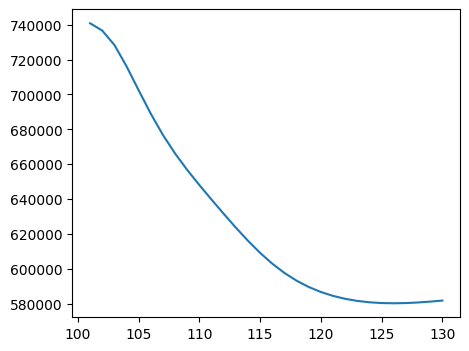

In [50]:

plt.figure(figsize=(5,4))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [44]:
df1

array([[0.10063785],
       [0.09236948],
       [0.09331443],
       ...,
       [0.29955115],
       [0.29151902],
       [0.31514292]])

In [45]:
scaler.inverse_transform(lst_output)

array([[699.67360692],
       [695.71633777],
       [687.94242878],
       [676.36597756],
       [663.34866723],
       [650.61163783],
       [639.11586161],
       [629.06178028],
       [620.16107063],
       [611.96331831],
       [604.10193782],
       [596.40988651],
       [588.91917574],
       [581.79061937],
       [575.22338179],
       [569.38155684],
       [564.3560852 ],
       [560.15980298],
       [556.74515041],
       [554.03066404],
       [551.92431508],
       [550.33984628],
       [549.20366297],
       [548.45524316],
       [548.04321094],
       [547.92082654],
       [548.04205979],
       [548.35979247],
       [548.82551866],
       [549.39062206]])

In [46]:
df1 = scaler.inverse_transform(df1[1158:])
lst_output = scaler.inverse_transform(lst_output)

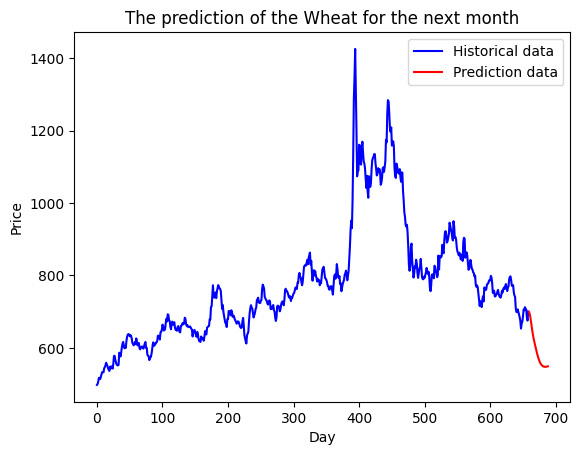

In [47]:
# plot df1
plt.plot(df1, color='blue', label='Historical data')

# plot lst_output starting at the end of df1
plt.plot(range(len(df1), len(df1) + len(lst_output)), lst_output, color='red', label='Prediction data')

# add legend and labels
plt.legend()
plt.xlabel('Day')
plt.ylabel('Price')
plt.title("The prediction of the Wheat for the next month")

# show the plot
plt.show()